<bound method Series.sort_index of 43675      0
25478      0
25483      0
13771      0
27622      0
        ... 
45103    332
45105    332
45109    332
45115    332
45123    332
Name: Address, Length: 45134, dtype: int64>
Elevator              7.520273e-01
Floor                 3.368283e+00
Area                  9.951566e+01
Parking               8.395445e-01
Room                  1.990672e+00
Price                 6.159466e+09
Warehouse             9.213010e-01
YearOfConstruction    1.392184e+03
Address               1.988210e+02
dtype: float64
[[ 0.23638693]
 [-0.02837221]
 [-0.08630241]
 ...
 [ 0.72673376]
 [ 0.08131007]
 [-0.058194  ]]
Mean Absolute Error (MAE): 0.3247955504842329
Mean Squared Error (MSE): 0.5729318708940873
Root Mean Squared Error (MSE): 0.756922632039819


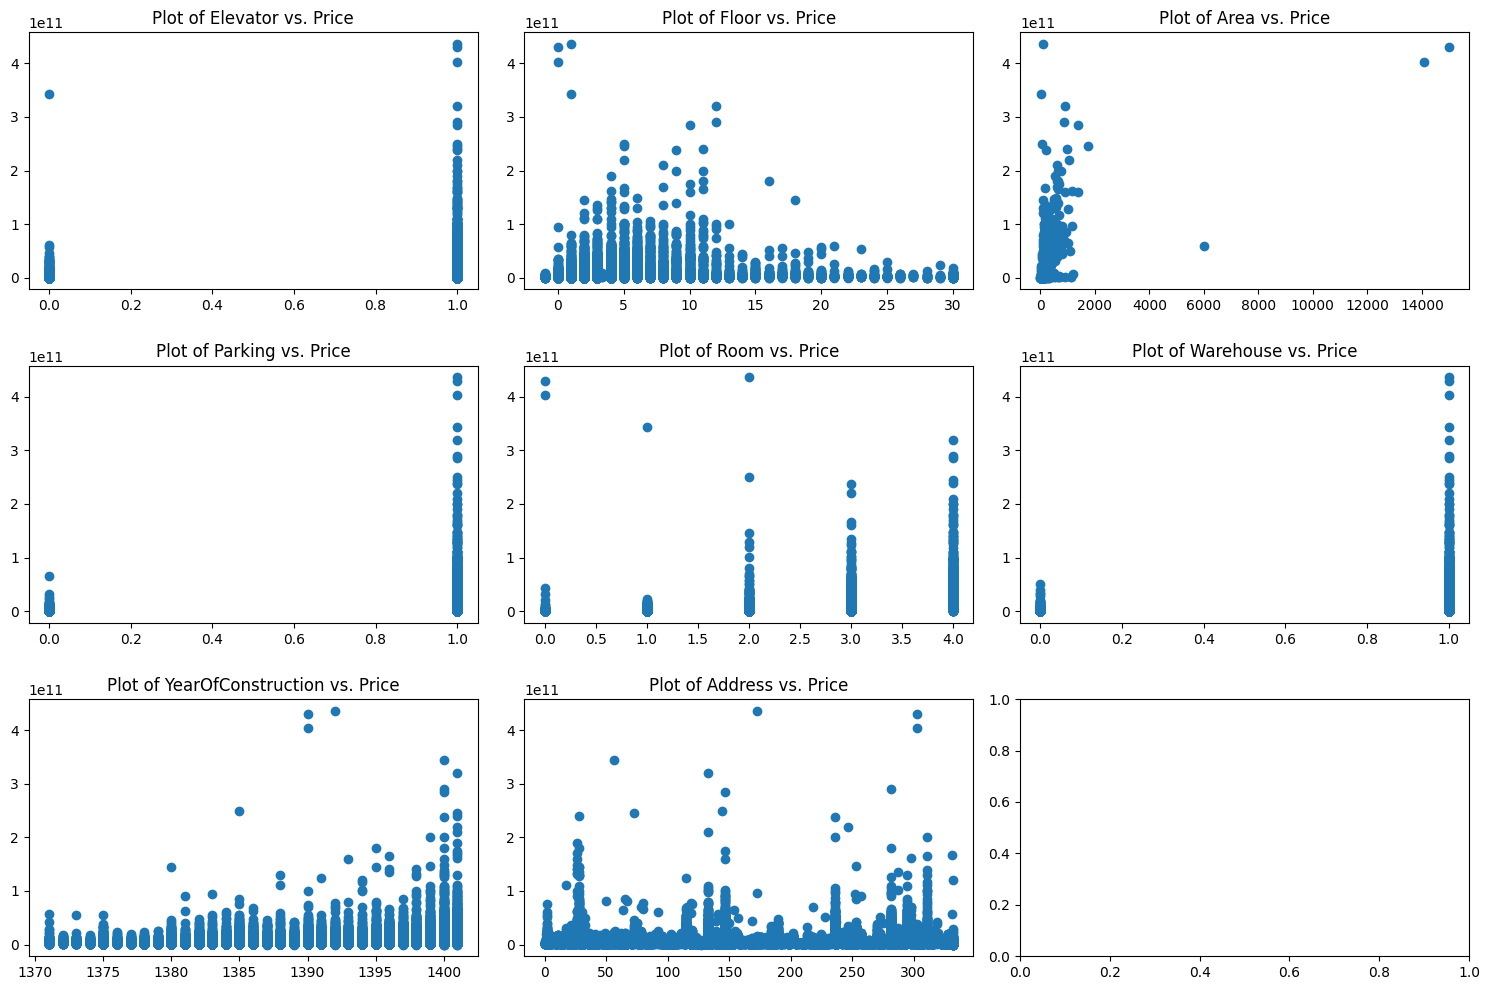

Mean of Price: 6159466196.315882


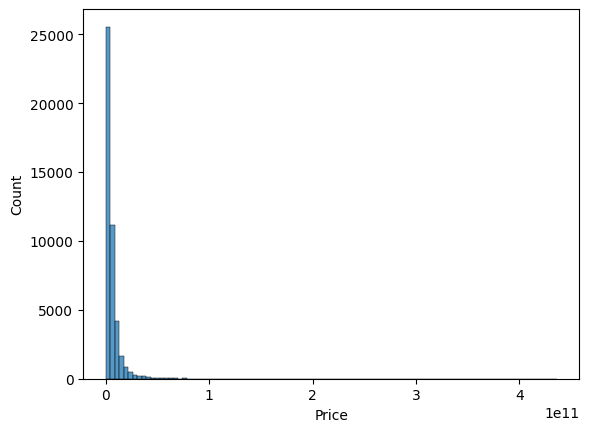

difference between Actual y and perdicted y with X_text : [[ 0.28130746]
 [ 0.02744591]
 [-0.25025953]
 ...
 [ 0.2361916 ]
 [-0.64782648]
 [-0.30478824]]


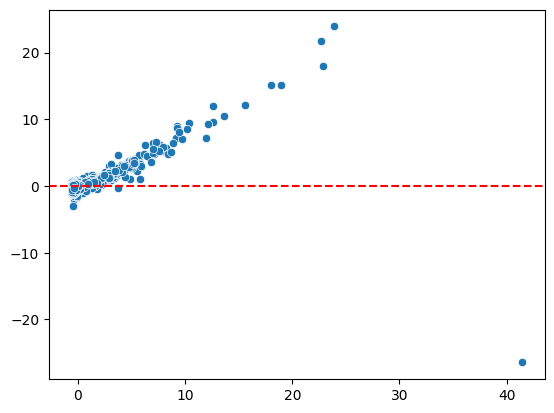

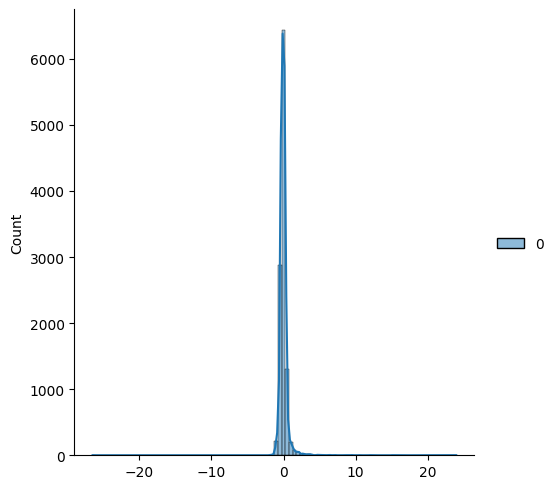

In [ ]:
#1
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import dump, load

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


DataSet_Path="/content/drive/MyDrive/DataSets/HouseNew.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(DataSet_Path)

df.sort_values(by='Address', inplace=True)

# Remove the 'Address' column
# df = df.drop('Address', axis=1)
# sorted(list(Address_list))
# Convert boolean (categorical) columns to numerical values
label_encoder = LabelEncoder()
df['Elevator'] = label_encoder.fit_transform(df['Elevator'])
df['Parking'] = label_encoder.fit_transform(df['Parking'])
df['Warehouse'] = label_encoder.fit_transform(df['Warehouse'])
df['Address'] = label_encoder.fit_transform(df['Address'])
print(df['Address'].sort_index)
# print(df.head(5).to_string())
# print(df.info())
# print(df.isna().sum())

missing_values = df.isnull().sum()
column_means = df.mean()
print(column_means)

# df.fillna(df.mean(numeric_only=True),inplace=True)

# print(type(missing_values))
# print(missing_values)
# print(missing_values.index)

#Fill missing_values with Mean
for column in missing_values.index:
    if missing_values[column] > 0:
        df[column].fillna(column_means[column], inplace=True)
# print(df.isna().sum())

# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Normalize both X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)

# Reshape y to a 2D array before scaling
y = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)

# Calculate the mean absolute error (MAE) and mean squared error (MSE) and Root mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Print the MAE and MSE
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (MSE): {rmse}')

# Specify the columns you want to create scatterplots for
columns_to_plot = ['Elevator', 'Floor', 'Area', 'Parking', 'Room', 'Warehouse', 'YearOfConstruction','Address']
##############################
#Create scatterplots way #1
# for column in columns_to_plot:
#     sns.scatterplot(x=column, y='Price', data=df)
#     plt.title(f'Scatterplot of {column} vs. Price')
#     plt.show()
##############################
num_features = X.shape[1]
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots and plot each feature against the target variable
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# List of column names from the original DataFrame
columns = df.drop('Price', axis=1).columns

#Create scatterplots way #2
for i in range(num_features):
    row, col = divmod(i, num_cols)
    axes[row, col].scatter(x=columns_to_plot[i], y='Price', data=df)
    axes[row, col].set_title(f'Plot of {columns[i]} vs. Price')

plt.tight_layout()
plt.show()
##############################

Mean_of_Price=df['Price'].mean()
print(f'Mean of Price: {Mean_of_Price}')

sns.histplot(data=df, x='Price', bins=100)
plt.show()

test_residual = y_test - y_pred

print(f'difference between Actual y and perdicted y with X_text : {test_residual}')

# print(type(test_residual))
# print(y_test.shape)
# print(test_residual.shape)

# y_test and test_residual are 2D arrays due to the scaling so it should convert them back to 1D arrays to create scatterplot.
#https://blog.faradars.org/27-things-that-a-beginner-needs-to-know-about-numpy/

sns.scatterplot(x=y_test.ravel(), y=test_residual.ravel())
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#KDE=Kernel Density Estimation
sns.displot(test_residual, bins=100, kde=True)
plt.show()

Index(['Elevator', 'Floor', 'Area', 'Parking', 'Room', 'Warehouse',
       'YearOfConstruction', 'Address'],
      dtype='object')


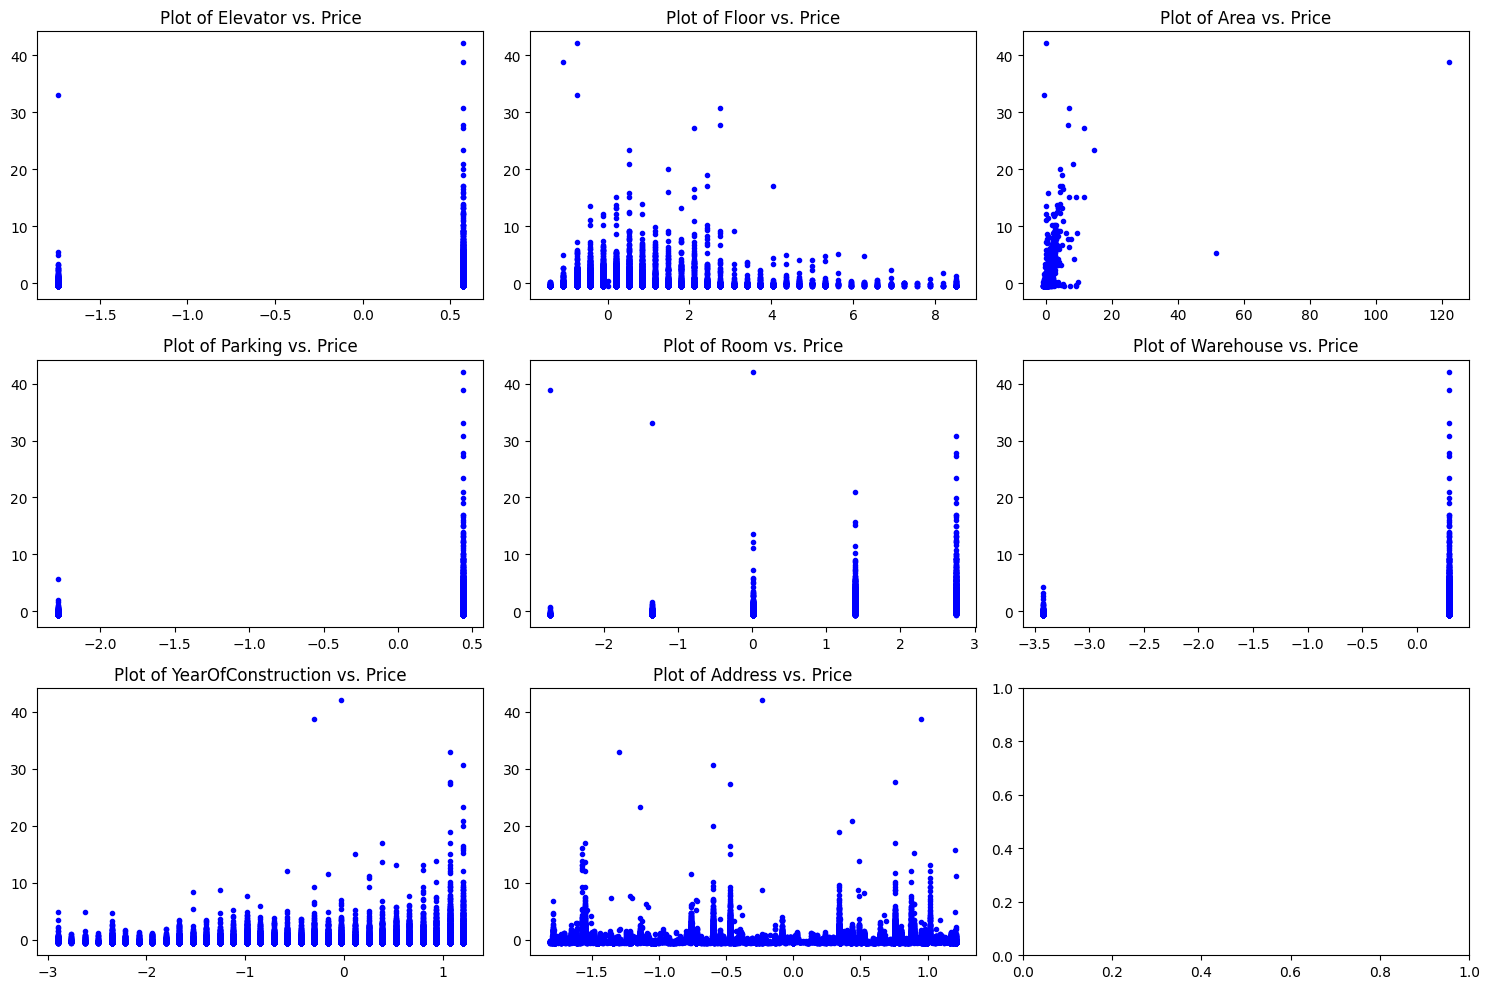

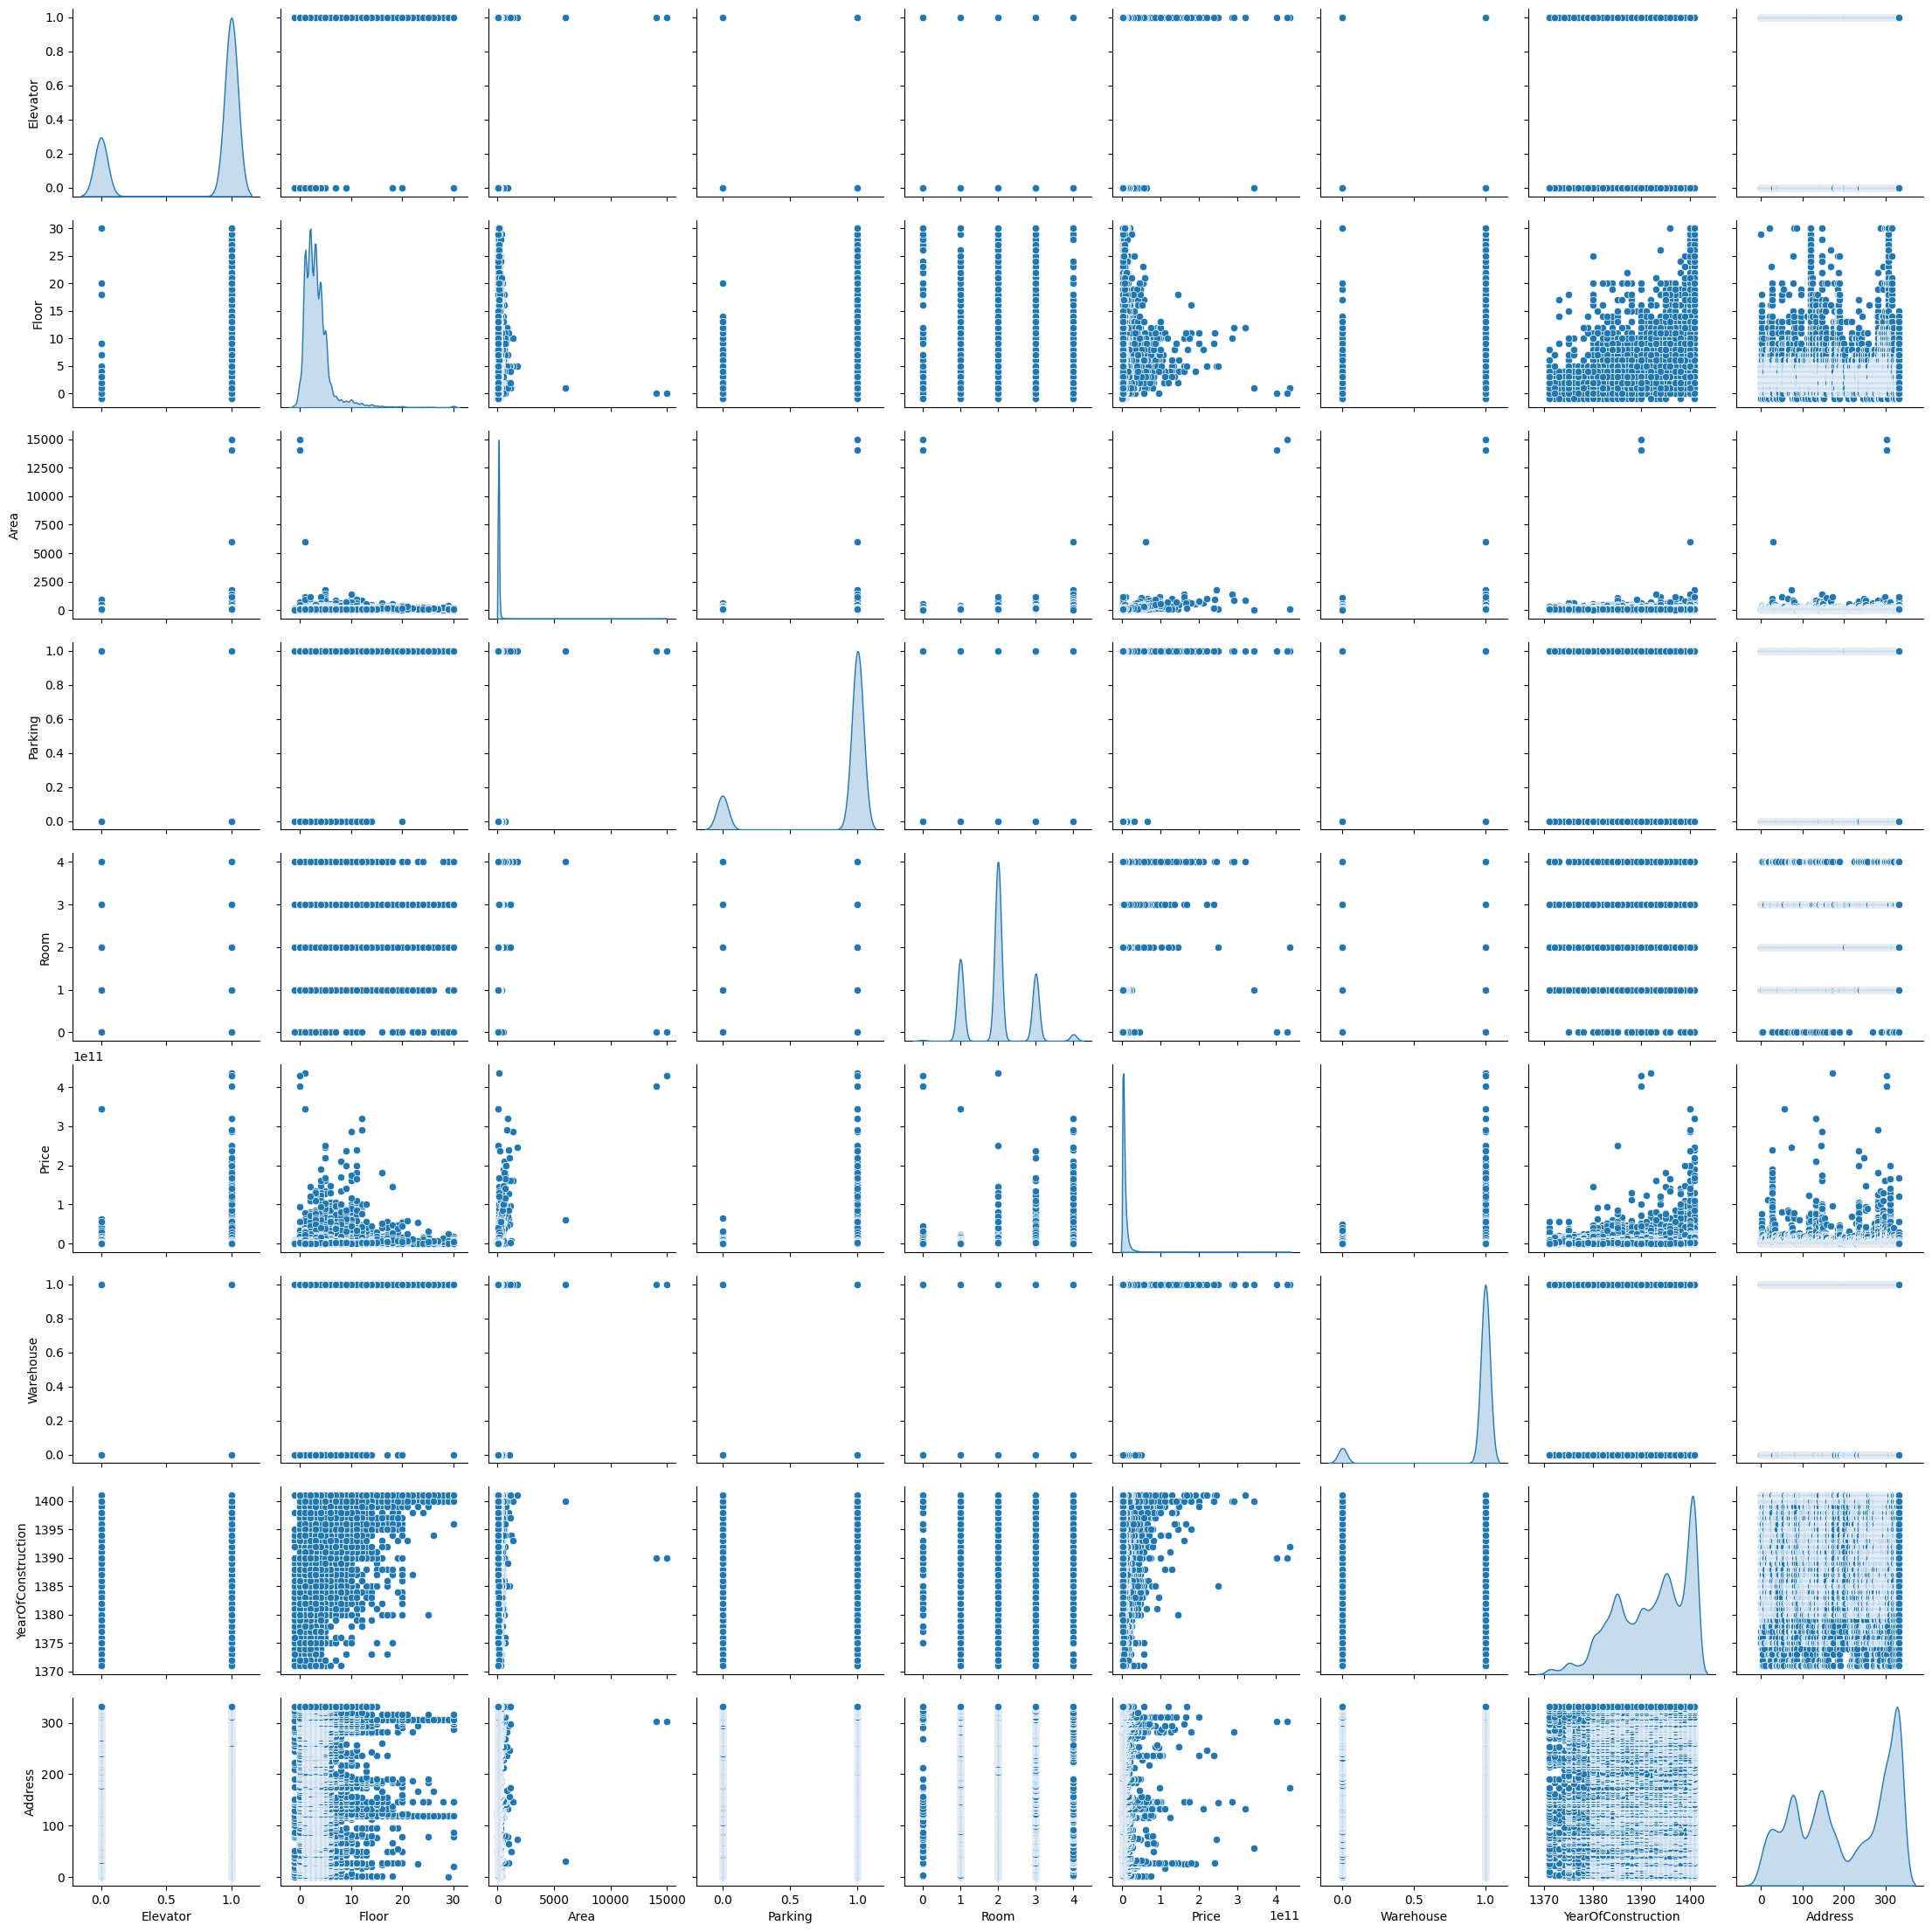

In [ ]:
#2
# Determine the number of rows and columns for subplots based on the number of features
# print(X.shape)
# print(X.shape[1])

num_features = X.shape[1]
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots and plot each feature against the target variable
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# List of column names from the original DataFrame
columns = df.drop('Price', axis=1).columns
print(columns)

for i in range(num_features):
    row, col = divmod(i, num_cols)
    axes[row, col].plot(X_train[:, i], y_train, 'b.')
    axes[row, col].set_title(f'Plot of {columns[i]} vs. Price')

plt.tight_layout()
plt.show()

#Watching Relationships between features
sns.pairplot(df, diag_kind='kde')
plt.show()

Index(['Elevator', 'Floor', 'Area', 'Parking', 'Room', 'Warehouse',
       'YearOfConstruction', 'Address'],
      dtype='object')


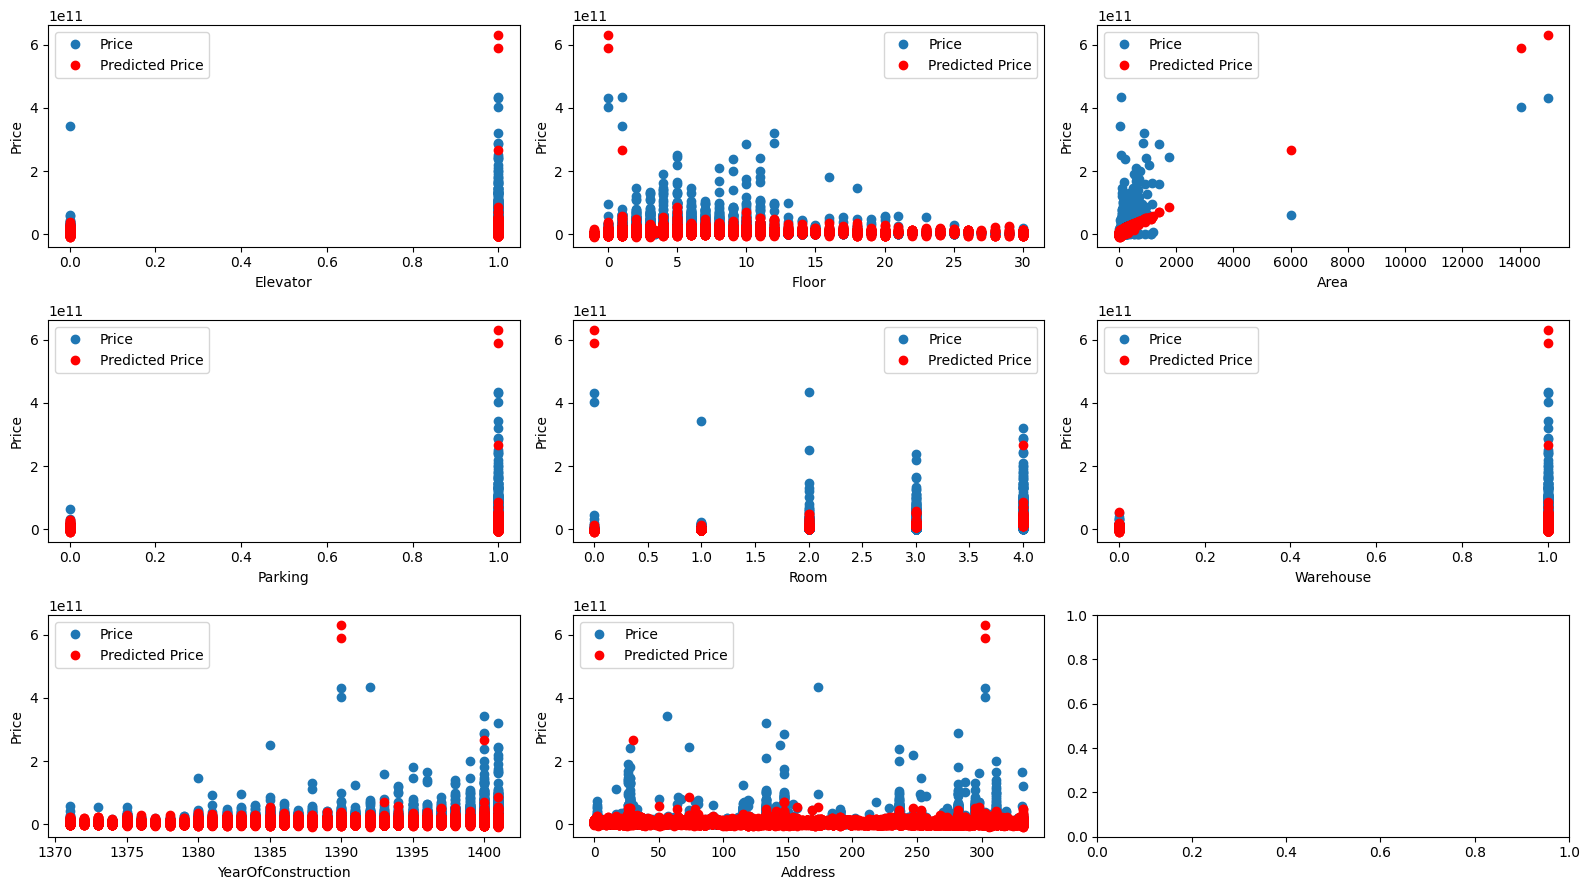

In [ ]:
#3
#  df.columns
# Split the data into features (X) and the target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']
print(X.columns)

final_model = LinearRegression()
final_model.fit(X.values, y)
y_hat = final_model.predict(X.values)
# print(y_hat)
# print(type(y_hat))
# print(y_hat.shape)
# ------------------------------


columns_to_compare = ['Elevator', 'Floor', 'Area', 'Parking', 'Room', 'Warehouse', 'YearOfConstruction','Address']

# Determine the number of rows and columns needed based on the number of columns to compare
num_columns = len(columns_to_compare)
num_rows = math.ceil(num_columns / 3)
num_cols = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 9))

for i, column in enumerate(columns_to_compare):
    row, col = divmod(i, num_cols)
    axes[row, col].plot(df[column], df['Price'], 'o', label='Price')
    axes[row, col].plot(df[column], y_hat, 'o', color='red', label='Predicted Price')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Price')
    axes[row, col].legend()

plt.tight_layout()
plt.show()
# print(X.columns)

[ 6.89903650e+08  6.24320012e+06  4.25234326e+07  1.26433385e+08
  4.21209842e+09  9.17064484e+08  9.45641389e+06 -5.16004164e+06]
-20087229205.53784


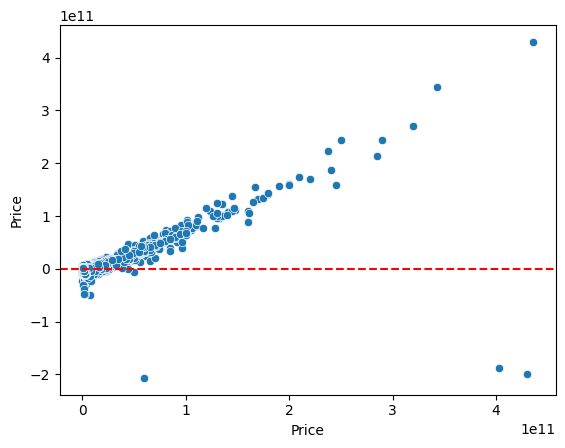

                     Coefficient
Elevator            6.899036e+08
Floor               6.243200e+06
Area                4.252343e+07
Parking             1.264334e+08
Room                4.212098e+09
Warehouse           9.170645e+08
YearOfConstruction  9.456414e+06
Address            -5.160042e+06
                       intercept
Elevator           -2.008723e+10
Floor              -2.008723e+10
Area               -2.008723e+10
Parking            -2.008723e+10
Room               -2.008723e+10
Warehouse          -2.008723e+10
YearOfConstruction -2.008723e+10
Address            -2.008723e+10
       Elevator  Floor  Area  Parking  Room       Price  Warehouse  YearOfConstruction  Address
43675         1    3.0   125        1     2  4300000000          1                1397        0
25478         0    3.0    57        0     1  1700000000          1                1382        0
25483         1    9.0   140        1     3  1540000000          1                1400        0
13771         0    2.0

In [ ]:
#4
residuals = y - y_hat
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
print(final_model.coef_)
print(final_model.intercept_)
plt.show()
# print(X.columns)
#
intercept_df = pd.DataFrame(final_model.intercept_, X.columns, columns=['intercept'])
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
print(intercept_df)

print(df.head().to_string())
print(X.head().to_string())

#####################################################################
# Elevator  Floor  Area  Parking  Room  Warehouse  YearOfConstruction  Address
# 0         3.0    49        1     1          1                1392       10
# Price
# 1750000000
#####################################################################
newdata = [[1,3,60,1,1,1,1393,10]]
final_model.predict(newdata)

# Example NumPy array with scientific notation
Price_Predicted = final_model.predict(newdata)  # Assuming this is a NumPy array

# Extract the first element and convert it to a normal format
formatted_number = f"{Price_Predicted[0]:.0f}"

print(formatted_number)

DataSet_Path="/content/drive/MyDrive/DataSets/HouseNew.csv"

# from joblib import dump, load
dump(final_model, '/content/drive/MyDrive/DataSets/Price_new_model.joblib')
#
loaded_model = load('/content/drive/MyDrive/DataSets/Price_new_model.joblib')
print(loaded_model.predict([[1,3.0,60,1,1,1,1393,10]]))

